In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. LOAD DATA (Strictly from R)
print("Loading PlantGrowth dataset from R...")
dataset = sm.datasets.get_rdataset("PlantGrowth", "datasets")
df = dataset.data

Loading PlantGrowth dataset from R...


Loading PlantGrowth dataset from R...


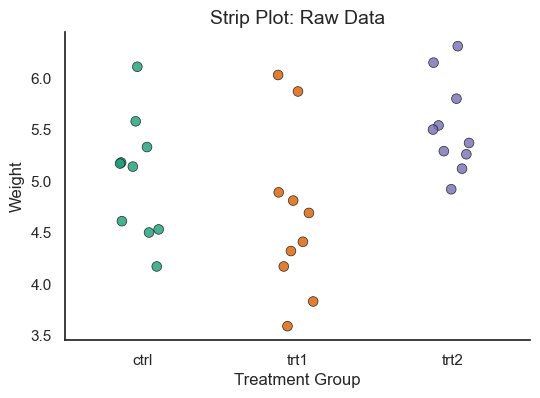

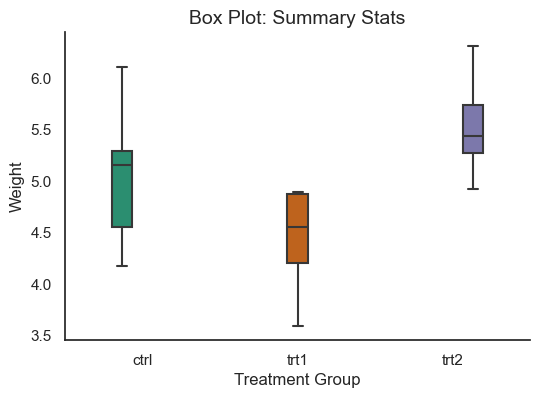

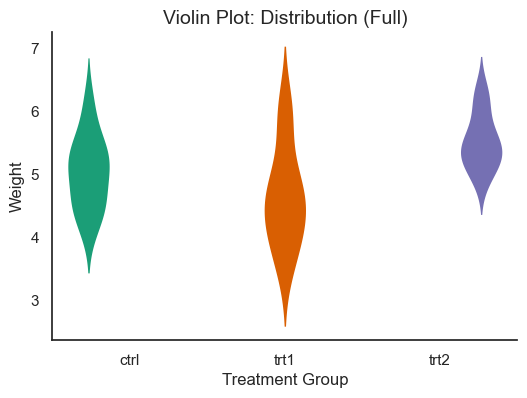

In [35]:
sns.set_theme(style="white", rc={"figure.facecolor": (0, 0, 0, 0), "axes.facecolor": (0, 0, 0, 0)})
my_pal = ["#1b9e77", "#d95f02", "#7570b3"]

plt.figure(figsize=(6, 4))
sns.stripplot(x="group", y="weight", data=df, palette=my_pal, hue="group",
              size=7, jitter=0.15, alpha=0.8, edgecolor="black", linewidth=0.5)

if plt.gca().get_legend() is not None: plt.gca().get_legend().remove()

plt.title("Strip Plot: Raw Data", fontsize=14)
plt.ylabel("Weight")
plt.xlabel("Treatment Group")
sns.despine()

plt.savefig('graph1_rain.png', bbox_inches='tight', transparent=True)
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x="group", y="weight", data=df, palette=my_pal, hue="group",
            width=0.4, showfliers=False)

if plt.gca().get_legend() is not None: plt.gca().get_legend().remove()

plt.title("Box Plot: Summary Stats", fontsize=14)
plt.ylabel("Weight")
plt.xlabel("Treatment Group")
sns.despine()

plt.savefig('graph2_box.png', bbox_inches='tight', transparent=True)
plt.show()

plt.figure(figsize=(6, 4))

# Draw Full Violin (No cutting logic)
sns.violinplot(x="group", y="weight", data=df, palette=my_pal, hue="group",
               inner=None, linewidth=0, saturation=1, alpha=0.7)

if plt.gca().get_legend() is not None: plt.gca().get_legend().remove()

plt.title("Violin Plot: Distribution (Full)", fontsize=14)
plt.ylabel("Weight")
plt.xlabel("Treatment Group")
sns.despine()

# Save
plt.savefig('graph3_cloud.png', bbox_inches='tight', transparent=True)
plt.show()

In [36]:
print("\nAssumption #5: Shapiro-Wilk Test for Normality")
for group in df['group'].unique():
    data_g = df[df['group'] == group]['weight']
    stat, p = stats.shapiro(data_g)
    print(f"Group: {group:4} | W = {stat:.4f}, p = {p:.4f}")

print("\nAssumption #6: Levene's Test for Homogeneity of Variances")
grouped = [df[df['group'] == g]['weight'] for g in df['group'].unique()]
stat, p = stats.levene(*grouped)
print(f"Levene: F = {stat:.4f}, p = {p:.4f}")

print("\n--- Descriptives ---")
print(df.groupby('group')['weight'].agg(['count', 'mean', 'std']).round(4))

print("\n--- One-Way ANOVA ---")
model = ols('weight ~ C(group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table.round(4))

print("\n--- Tukey HSD Post-Hoc ---")
tukey = pairwise_tukeyhsd(endog=df['weight'], groups=df['group'], alpha=0.05)
print(tukey)


Assumption #5: Shapiro-Wilk Test for Normality
Group: ctrl | W = 0.9567, p = 0.7475
Group: trt1 | W = 0.9304, p = 0.4519
Group: trt2 | W = 0.9410, p = 0.5643

Assumption #6: Levene's Test for Homogeneity of Variances
Levene: F = 1.1192, p = 0.3412

--- Descriptives ---
       count   mean     std
group                      
ctrl      10  5.032  0.5831
trt1      10  4.661  0.7937
trt2      10  5.526  0.4426

--- One-Way ANOVA ---
           sum_sq    df       F  PR(>F)
C(group)   3.7663   2.0  4.8461  0.0159
Residual  10.4921  27.0     NaN     NaN

--- Tukey HSD Post-Hoc ---
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------
